# Relatório Parcial - Maratona de filmes

## Introdução

Este projeto tem como objetivo abordar o problema da "Maratona de Filmes", no qual se deseja maximizar o número de filmes assistidos em um dia, respeitando o limite de filmes por categoria e o período do horário de início dos filmes (que deve ser entre 0 e 23h). O desafio consiste em encontrar a melhor combinação de filmes para assistir, evitando também possíveis lacunas, sem filmes em certos horários. 

Para solucionar este problema, será utilizada uma abordagem heurística, que consiste em utilizar técnicas de otimização para buscar uma solução aproximada para o problema. A estratégia adotada será a heurística gulosa, que consiste em fazer escolhas locais ótimas em cada etapa do processo.

Ademais, será utilizada também uma técnica de aleatorização para tentar encontrar soluções melhores, usando "exploration". A aleatorização consiste em introduzir um elemento de aleatoriedade no processo, permitindo explorar diferentes combinações de filmes.

### Input para o projeto:

Para o projeto foi usado um gerador de inputs, que são arquivos txt contendo informações úteis sobre cada filme. As linhas deste arquivo representam as seguintes informações:

- A primeira linha contém dois números, sendo o primeiro a quantidade de filmes e o segundo número a quantidade de categorias;

- Cada um dos números da segunda linha representa o máximo de filmes que cada categoria pode ter, respectivamente. 

- Cada linha a partir da terceira representa um filme e possui três números: 
  - o primeiro é o horário de início do filme
  - o segundo é o horário em que este filme termina
  - o terceiro é a categoria a qual este filme pertence. 

**Exemplo:**

```
10 4
1 3 1 2 
11 13 3
14 15 3
13 15 3
14 15 1
12 16 4
12 13 4
```

- a primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
- a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
- da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.

## Heurística gulosa

O primeiro método implementado foi a heurística gulosa, que busca soluções aproximadas, sem que haja garantia de encontrar a melhor solução possível globalmente. Deste modo, a técnica usada consiste na realização de escolhas locais ótimas em cada etapa do processo, chegando-se o mais próximo possível do que seria uma solução globalmente ótima. Apesar disso, a heurística possui algumas vantagens, como a simplicidade computacional e seus resultados são obtidos em um tempo razoável.




### Código fonte

A seguir, é mostrado o processo para a construção da heurística gulosa, que ordena os filmes por hora de fim crescente e escolhe aqueles que começam primeiro e não conflitam com os filmes já escolhidos, além de verificar se há vagas disponíveis na categoria do filme.


O primeiro passo foi fazer uma struct `movie`, que representa um filme. Possui como características o id do filme, o horário de início e fim, seu tempo de duração e a categoria à qual pertence.

Depois, apresenta-se a função `compare_movies`, que compara o horário de início de dois dados filmes.

```
struct movie{
    int id;
    int start_time;
    int end_time;
    int time;
    int category;
};

bool compare_movies(movie a, movie b){
    return a.start_time < b.start_time;
}
```

Depois, o próximo passo foi ler os inputs. Deste modo, na `main`, as informações foram armazenadas em variáveis com objetivo de serem usadas posteriormente.

Ademais, foi criado um vetor de filmes, cujos atributos foram preenchidos conforme as informações lidas.

O código abaixo mostra como a leitura foi feita.

```
int main(){
    // LEITURA DOS INPUTS

    // n = quantidade de filmes, m = quantidade de categorias
    int n, m;
    cin >> n >> m;

    // Quantidade máxima de filmes assistidos de cada categoria
    vector<int> max_movies(m); 

    for(int i = 0; i < m; i++){
        cin >> max_movies[i];
    }

    vector<movie> movies(n); // Vetor de filmes

    for(int i = 0; i < n; i++){
        cin >> movies[i].start_time >> movies[i].end_time >> movies[i].category;

        // Se o horário de fim for 0, considerar como 24
        if(movies[i].end_time == 0){
            movies[i].end_time = 24;
        }

        // Calcular duração do filme   
        movies[i].time = movies[i].end_time - movies[i].start_time;
        movies[i].id = i + 1;
    }
}
```

**Algumas observações:**

- O vetor `max_movies` foi criado de modo a ter como tamanho `m`, ou seja, o número de categorias. Cada um dos índices (de 0 a `m`) é uma categoria e contém a quantidade máxima de filmes que é permitida, de acordo com o input.

- Filmes cujo fim é 0 tiveram um ajuste, deixando o fim como 24. Isso foi feito para auxiliar na lógica de que não se deve exceder as 24h de um dia, ou seja, o horário de término deve sempre ser maior que o horário de início.

Depois foi feita a função `choose_movies`, que retorna um vetor com os filmes selecionados na maratona.

Essa função recebe um vetor de filmes e o vetor com as quantidades máximas de filmes por categoria.

**Observação:** Para a implementação, os filmes foram ordenados pelo início, usando a função `compare_movies`. Deste modo, os filmes foram percorridos de acordo com o horário de início. Ademais, são priorizados filmes com menor duração, estratégia adotada de modo a permitir maior quantidade de filmes na maratona.

```
vector<movie> choose_movies(vector<movie> movies, vector<int> max_movies){
    vector<movie> result;
    vector<int> current_movies(max_movies.size(), 0); // Quantidade atual de filmes assistidos de cada categoria
    int current_time = 0; // Hora atual

    // ordenar os filmes por horário de início
    sort(movies.begin(), movies.end(), compare_movies);

    // Escolher o filme com menor duração para cada horário de início disponível 
    for(int current_time = movies.front().start_time; current_time <= 23; current_time++){
        
        movie next_movie = {-1, -1, -1, -1, -1}; // Próximo filme a ser assistido

        // Percorrer filmes com horário de início igual ou maior ao horário atual
        // pegar filme com menor duração que ainda não foi assistido e que pertence a este horário
        for(int i = 0; i < movies.size(); i++){
            // Se o filme começa no horário atual e termina depois do horário atual e o horário de início é menor que o horário de fim
            if(movies[i].start_time == current_time && movies[i].end_time > current_time && (movies[i].start_time < movies[i].end_time)){
                // Se o filme não foi assistido ou se ele tem menor duração que o filme atual
                if(next_movie.id == -1 || movies[i].time < next_movie.time){
                    // Se a categoria do filme não atingiu o limite de filmes assistidos
                    if(current_movies[movies[i].category-1] < max_movies[movies[i].category-1]){
                        next_movie = movies[i];
                    }                 
                }
            }       
        }

        // Se o próximo filme for válido, adicionar ele ao resultado
        if(next_movie.id != -1 ){

            result.push_back(next_movie);

            // Atualizar a quantidade de filmes assistidos da categoria do filme
            current_movies[next_movie.category-1]++;

            // Atualizar o horário atual
            current_time = next_movie.end_time-1;

            // output para debug
            // mostrar o filme escolhido
            // cout << "Filme escolhido: " << next_movie.id << " " << next_movie.start_time << " " << next_movie.end_time << " " << next_movie.time << " " << next_movie.category << endl;
            // cout << "Horário atual: " << current_time << endl;
        }
    }

    return result;
}
```

Ainda na main, a função `choose_movies` é chamada e o output é montado.

```
    vector<movie> result = choose_movies(movies, max_movies);

    // Imprimir resultado
 
    // quantidade de filmes assistidos
    cout << result.size() << endl;

    for(int i = 0; i < result.size(); i++){
        cout << result[i].id << " ";
    }
    
    cout << endl;

    // imprimir quantidade de filmes assistidos de cada categoria
    for(int i = 0; i < max_movies.size(); i++){
        int count = 0;
        for(int j = 0; j < result.size(); j++){
            if(result[j].category == i+1){
                count++;
            }
        }
        cout << count << " ";
    }

    cout << endl;

    // Imprimir ID, horário de início, horário de fim, duração e categoria de cada filme assistido
    int total_time = 0;
    for(int i = 0; i < result.size(); i++){
        total_time += result[i].time;
        // cout << "Id: " << result[i].id << " " << "Início: " << result[i].start_time<< " " << "Fim: " << result[i].end_time << " " << "Duração: "<< result[i].time << " " << "Categoria: " << result[i].category << endl;
        cout << result[i].id << " " << result[i].start_time<< " " << result[i].end_time << " " << result[i].time << " " << result[i].category << endl;
    }

    cout << total_time << endl;
```

## Aleatorização

De modo a tentar obter resultados melhores, foi usada a estratégia de aleatorização. Para isso, a heurística gulosa apresentada acima foi adaptada de modo que, ao longo da seleção de filmes, se tenha 25% de chance de pegar um filme qualquer que respeite o horário, permitindo que a heurística tenha um pouco mais de exploration.

Para a adaptação, foi criada mais uma struct:

```
struct schedule{
    int start_time;
    vector<movie> movies;
    int total_movies;
};
```

Essa struct representa um horário em que um filme se inicia e tem como características a hora inicial, um vetor com filmes que começam nessa hora e por fim a quantidade de filmes.

Ademais, a função `choose_movies` foi modificada.



Dentre esses filmes, ao invés de ser escolhido aquele com menor duração, será feito um sorteio entre esses filmes. Caso haja apenas um filme neste horário, ele será escolhido e caso não haja nenhum, o horário atual será atualizado.

Na função, a parte adicionada foi:

```
    // Percorrendo horários possíveis de início - das 0h às 23h
    for(current_time = 0; current_time <= 23; current_time++){
        int total_hours = 0;

        // sortear números aleatórios entre 0 e 1
        uniform_real_distribution<double> distribution(0.0, 1.0);
        
        // para cada horário que um filme se inicia, next_movie é o filme com menor duração
        movie next_movie = {-1, -1, -1, -1, -1}; // Filme com menor duração para o horário atual
        // cout << "Início: "<< schedules[current_time].start_time << " " << schedules[current_time].total_movies << endl;
        
        vector<movie> lista_movies = schedules[current_time].movies;
        
        // Aleatorização: colocar na maratona filme com mesmo horário de início, porém aleatório

        // 25% de chance de adicionar o filme na maratona de forma aleatoria, respeitando tempo  
        if(distribution(generator) > 0.75){ 


            int n_movies = schedules[current_time].total_movies;                                    
                                                
            // pegar um filme aleatório que começa no horário atual e que ainda não foi assistido
            uniform_int_distribution<int> distribution(0, n_movies-1);
            int p = distribution(generator);
            
            // Se o filme aleatório não foi assistido ainda
            if(next_movie.id == -1){
                
                // enquantoo limite de filmes na categoria for atingido, sortear outro filme
                while (current_movies[lista_movies[p].category-1] >= max_movies[lista_movies[p].category-1] || (lista_movies[p].end_time <= lista_movies[p].start_time || lista_movies[p].end_time <= current_time)){
                    // garantir que o filme sorteado não seja o mesmo
                    
                    lista_movies.erase(lista_movies.begin() + p);
                    // n_movies = lista_movies.size();

                    // Se não houver mais filmes para sortear, sair do loop
                    if(lista_movies.size() == 0){
                        break;
                    }

                    // Sortear outro filme
                    if (lista_movies.size() == 1){
                        p = 0;
                    }
                    else{
                        distribution = uniform_int_distribution<int>(0, (lista_movies.size())-1);
                        p = distribution(generator);
                    }                               
                }                            
                
                if (current_movies[lista_movies[p].category-1] < max_movies[lista_movies[p].category-1])
                {
                    next_movie = lista_movies[p];
                }                        
            }                              
                // }        
            
        }


```

Como épossível ver, foi adicionada uma condicional, checando os 25% de chance para aleatoriezar. Caso contrário, os critérios da gulosa para um filme ser escolhido, são mantidos

```
        // Caso contrário, pegar o filme com menor duração que ainda não foi assistido e que pertence a este horário
        else{
            // Percorrer filmes com horário de início igual ou maior ao horário atual
            // pegar filme com menor duração que ainda não foi assistido e que pertence a este horario
            for(int i = 0; i < movies.size(); i++){
                if(movies[i].start_time == current_time && movies[i].end_time > current_time && (movies[i].start_time < movies[i].end_time)){
                    // Se o filme não foi assistido ou se ele tem menor duração que o filme atual
                    if(next_movie.id == -1 || movies[i].time < next_movie.time){
                        // Se a categoria do filme não atingiu o limite de filmes assistidos
                        if(current_movies[movies[i].category-1] < max_movies[movies[i].category-1]){
                            next_movie = movies[i];
                        }
                    }
                }       
            }
        }
```

Depois, é feito o push back, como na gulosa, e depois a quantidade de filmes na categoria é atualizado e o horário atual também.

Nota-se também que a função passa a receber o vetor `schedules`, com todos horários de início e as respectivas informações.

Assim, na main, para juntar os filmes que tem em comum o horário de início, foi usado o map, como mostrado abaixo. Assim, foi possível obter um vetor com os horários de início, que foi passado como argumento para a função `choose_movies`

```
    // vetor de horários de início
    vector<schedule> schedules(24);

    // map com chave sendo o horário de início e valor sendo um vetor de filmes
    map<int, vector<movie>> movies_by_start_time; 

    // Adicionar cada filme ao map
    for (const auto& m : movies) {
        // adiciona filme ao horário de início correspondente
        movies_by_start_time[m.start_time].push_back(m); 
    }

    for (int i = 0; i < 24; i++){
        // checar se o horário de início existe no map
        if(movies_by_start_time.find(i) != movies_by_start_time.end()){
            // se existir, adicionar ao vetor de horários de início
            schedules[i].start_time = i;
            schedules[i].movies = movies_by_start_time[i];
            schedules[i].total_movies = movies_by_start_time[i].size();
        }
        else{
            // se não existir, adicionar um horário de início vazio
            schedules[i].start_time = i;
            schedules[i].total_movies = 0;
        }     
    }


    vector<movie> result = choose_movies(movies, max_movies, schedules);
```

## Outputs

Para os outputs, foram colocadas as seguintes informações:
- Número de filmes assistidos
- IDs dos filmes assistidos com seus respectivos horários de início e fim, duração e categoria
- Quantidade de filmes assistidos por categoria a fim de checar se o limite de filmes por categoria foi respeitado
- Tempo total de maratona
A seguir, é mostrado um exemplo com o output comentado, para cada informação.

```
Quantidade de filmes assistidos: 10
IDS: 61 67 33 17 22 3 56 16 98 36 

Quantidade de filmes por categoria:
2 1 4 3 

Id: 61 Início: 0 Fim: 2 Duração: 2 Categoria: 3
Id: 67 Início: 2 Fim: 3 Duração: 1 Categoria: 1
Id: 33 Início: 3 Fim: 6 Duração: 3 Categoria: 2
Id: 17 Início: 6 Fim: 9 Duração: 3 Categoria: 4
Id: 22 Início: 9 Fim: 12 Duração: 3 Categoria: 4
Id: 3 Início: 12 Fim: 15 Duração: 3 Categoria: 1
Id: 56 Início: 16 Fim: 18 Duração: 2 Categoria: 4
Id: 16 Início: 18 Fim: 19 Duração: 1 Categoria: 3
Id: 98 Início: 19 Fim: 22 Duração: 3 Categoria: 3
Id: 36 Início: 22 Fim: 23 Duração: 1 Categoria: 3

Total de horas na maratona: 22

```
O formato do output do exemplo acima é:

```
10
61 67 33 17 22 3 56 16 98 36 
2 1 4 3 
61 0 2 2 3
67 2 3 1 1
33 3 6 3 2
17 6 9 3 4
22 9 12 3 4
3 12 15 3 1
56 16 18 2 4
16 18 19 1 3
98 19 22 3 3
36 22 23 1 3
22
```

## Considerações sobre o profiling(Valgrind)

### Gulosa:


Foram executados os comandos:

`valgrind --tool=callgrind ./gulosa < "input-1-11000-10.txt" > "input-1-11000-10-out.txt"`

O output foi:

```
==3365== Callgrind, a call-graph generating cache profiler
==3365== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==3365== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==3365== Command: ./gulosa
==3365== 
==3365== For interactive control, run 'callgrind_control -h'.
==3365== 
==3365== Events    : Ir
==3365== Collected : 77379205
==3365== 
==3365== I   refs:      77,379,205
```

Depois, foi executado:

`callgrind_annotate callgrind.out.3365 gulosa.cpp`

O output do comando foi:

```--------------------------------------------------------------------------------
Profile data file 'callgrind.out.3365' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 13878842
Trigger: Program termination
Profiled target:  ./gulosa (PID 3365, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
77,379,205  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,223,735  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
6,498,003  ???:choose_movies(std::vector<movie, std::allocator<movie> >, std::vector<int, std::allocator<int> >) [/content/gulosa]
5,901,975  ???:std::vector<movie, std::allocator<movie> >::operator[](unsigned long) [/content/gulosa]
5,507,002  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
5,077,044  ???:bool __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>::operator()<__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >) [/content/gulosa]
4,293,506  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,229,600  ???:std::vector<movie, std::allocator<movie> >::size() const [/content/gulosa]
3,615,584  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
2,876,704  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator*() const [/content/gulosa]
2,773,008  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,033,766  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,959,994  ???:std::enable_if<std::__and_<std::__not_<std::__is_tuple_like<movie> >, std::is_move_constructible<movie>, std::is_move_assignable<movie> >::value, void>::type std::swap<movie>(movie&, movie&) [/content/gulosa]
1,917,786  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > std::__unguarded_partition<__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)> >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>) [/content/gulosa]
1,815,660  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,287,663  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,191,195  ???:compare_movies(movie, movie) [/content/gulosa]
1,057,472  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
1,050,255  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
1,033,046  ???:std::remove_reference<movie&>::type&& std::move<movie&>(movie&) [/content/gulosa]
  923,256  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator++() [/content/gulosa]
  917,444  ???:void std::iter_swap<__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >) [/content/gulosa]
  892,553  ???:main [/content/gulosa]
  875,742  ???:bool __gnu_cxx::operator< <movie*, std::vector<movie, std::allocator<movie> > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&) [/content/gulosa]
  780,500  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::base() const [/content/gulosa]
  748,620  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator--() [/content/gulosa]
  729,696  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  641,163  ???:void std::__unguarded_linear_insert<__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Val_comp_iter<bool (*)(movie, movie)> >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Val_comp_iter<bool (*)(movie, movie)>) [/content/gulosa]
  639,800  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  627,874  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  611,903  ???:0x00000000048f2130 [???]
  595,152  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  594,306  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  564,793  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  495,645  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  451,953  ???:0x00000000048ef880 [???]
  413,028  ???:bool __gnu_cxx::__ops::_Val_comp_iter<bool (*)(movie, movie)>::operator()<movie, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > >(movie&, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >) [/content/gulosa]
  274,607  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  241,978  ???:__gnu_cxx::__ops::_Val_comp_iter<bool (*)(movie, movie)> __gnu_cxx::__ops::__val_comp_iter<bool (*)(movie, movie)>(__gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>) [/content/gulosa]
  231,042  ???:bool __gnu_cxx::operator!=<movie*, std::vector<movie, std::allocator<movie> > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&) [/content/gulosa]
  220,166  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S:__memcpy_avx_unaligned_erms [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  208,721  ???:void std::__unguarded_insertion_sort<__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)> >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>) [/content/gulosa]
  200,052  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  164,985  ???:__gnu_cxx::__ops::_Val_comp_iter<bool (*)(movie, movie)>::_Val_comp_iter(__gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>&&) [/content/gulosa]
  143,013  ???:__gnu_cxx::__enable_if<!std::__is_scalar<movie>::__value, movie*>::__type std::__fill_n_a<movie*, unsigned long, movie>(movie*, unsigned long, movie const&) [/content/gulosa]
  118,529  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   99,129  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   90,441  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   87,957  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator+(long) const [/content/gulosa]
   83,239  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   77,007  ???:std::remove_reference<bool (*&)(movie, movie)>::type&& std::move<bool (*&)(movie, movie)>(bool (*&)(movie, movie)) [/content/gulosa]
   76,993  ???:std::remove_reference<__gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>&>::type&& std::move<__gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>&>(__gnu_cxx::__ops::_Iter_comp_iter<bool (*)(movie, movie)>&) [/content/gulosa]
   75,975  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::difference_type __gnu_cxx::operator-<movie*, std::vector<movie, std::allocator<movie> > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&) [/content/gulosa]
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   66,561  ???:0x00000000048ef4f0 [???]
   66,097  ???:0x00000000048f2080 [???]
   66,092  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   66,091  ???:0x00000000048f0530 [???]
   66,029  ???:0x00000000048eff30 [???]

--------------------------------------------------------------------------------
-- User-annotated source: gulosa.cpp
--------------------------------------------------------------------------------
  No information has been collected for gulosa.cpp```

O output mostra que o programa executou um total de 77,379,205 instruções.

As funções com maior número de instruções foram:
- std::num_get::_M_extract_int:  Esta é uma função da biblioteca padrão do C++ que extrai um número inteiro de uma string. foi chamada mais de 8 milhões de vezes;

- choose_movies: executou 6,498,003 instruções;

- std::vector::operator[]: Esta é uma função da biblioteca padrão do C++ que retorna uma referência ao elemento em uma posição específica de um vetor. Foi chamada quase 6 milhões de vezes;

- getc: Esta é uma função da biblioteca padrão do C que lê um caractere de um arquivo. Foi chamada mais de 5 milhões de vezes;

- __gnu_cxx::__ops::_Iter_comp_iter: operador que realiza a comparação entre elementos de um contêiner genérico usando iteradores como argumentos. Ele é parte da biblioteca padrão GNU C++ e é usado internamente pelo compilador para operações de comparação em estruturas de dados, como vetores e listas. Foi executado mais de 5 milhões de vezes.


É possível dizer que faz sentido a função `choose_movies` possuir um alto número de instruções, dado que a implementação na heurística é feita nela, tendo as iterações pelos inputs.

### Aleatória

Foram executados os comandos, assim como para a gulosa:

`valgrind --tool=callgrind ./gulosa < "input-1-11000-10.txt" > "input-1-11000-10-out.txt"`

A saída foi:
```
==6736== Callgrind, a call-graph generating cache profiler
==6736== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==6736== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==6736== Command: ./aleatoria
==6736== 
==6736== For interactive control, run 'callgrind_control -h'.
==6736== 
==6736== Events    : Ir
==6736== Collected : 60200081
==6736== 
==6736== I   refs:      60,200,081
```

Depois, foi executado:

`callgrind_annotate callgrind.out.6736 aleatoria.cpp`

A saída foi:

```
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.6736' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 12437036
Trigger: Program termination
Profiled target:  ./aleatoria (PID 6736, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatoria.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
60,200,081  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,223,735  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
5,507,002  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,293,506  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,615,584  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,419,145  ???:std::vector<movie, std::allocator<movie> >::operator[](unsigned long) [/content/aleatoria]
2,974,612  ???:choose_movies(std::vector<movie, std::allocator<movie> >, std::vector<int, std::allocator<int> >, std::vector<schedule, std::allocator<schedule> >) [/content/aleatoria]
2,773,008  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,033,766  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,956,448  ???:std::vector<movie, std::allocator<movie> >::size() const [/content/aleatoria]
1,815,660  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,417,700  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_M_lower_bound(std::_Rb_tree_node<std::pair<int const, std::vector<movie, std::allocator<movie> > > >*, std::_Rb_tree_node_base*, int const&) [/content/aleatoria]
1,287,663  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,176,967  ???:main [/content/aleatoria]
1,115,100  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_S_key(std::_Rb_tree_node<std::pair<int const, std::vector<movie, std::allocator<movie> > > > const*) [/content/aleatoria]
1,057,184  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
1,051,959  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  946,510  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S:__memcpy_avx_unaligned_erms [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  897,540  ???:std::less<int>::operator()(int const&, int const&) const [/content/aleatoria]
  728,508  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  639,800  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  627,703  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  611,903  ???:0x00000000048f2130 [???]
  608,126  ???:std::map<int, std::vector<movie, std::allocator<movie> >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::operator[](int const&) [/content/aleatoria]
  594,900  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  594,306  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  584,100  ???:std::_Rb_tree_node<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_valptr() const [/content/aleatoria]
  565,569  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  531,000  ???:__gnu_cxx::__aligned_membuf<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_ptr() const [/content/aleatoria]
  495,510  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  451,953  ???:0x00000000048ef880 [???]
  424,800  ???:std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::operator()(std::pair<int const, std::vector<movie, std::allocator<movie> > > const&) const [/content/aleatoria]
  371,700  ???:__gnu_cxx::__aligned_membuf<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_addr() const [/content/aleatoria]
  308,420  ???:void __gnu_cxx::new_allocator<movie>::construct<movie, movie const&>(movie*, movie const&) [/content/aleatoria]
  307,440  ???:std::vector<movie, std::allocator<movie> >::push_back(movie const&) [/content/aleatoria]
  276,200  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::lower_bound(int const&) [/content/aleatoria]
  274,808  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  244,398  ???:std::_Rb_tree_iterator<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_Rb_tree_iterator(std::_Rb_tree_node_base*) [/content/aleatoria]
  243,551  ???:std::_Rb_tree_node<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_valptr() [/content/aleatoria]
  243,023  ???:std::_Rb_tree_iterator<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::operator*() const [/content/aleatoria]
  236,096  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_S_left(std::_Rb_tree_node_base*) [/content/aleatoria]
  231,063  ???:bool __gnu_cxx::operator!=<movie*, std::vector<movie, std::allocator<movie> > >(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&, __gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > > const&) [/content/aleatoria]
  221,920  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::end() [/content/aleatoria]
  221,410  ???:__gnu_cxx::__aligned_membuf<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_ptr() [/content/aleatoria]
  209,285  ???:void std::allocator_traits<std::allocator<movie> >::construct<movie, movie const&>(std::allocator<movie>&, movie*, movie const&) [/content/aleatoria]
  199,728  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  188,344  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_S_right(std::_Rb_tree_node_base*) [/content/aleatoria]
  160,972  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::base() const [/content/aleatoria]
  155,925  ???:movie const& std::forward<movie const&>(std::remove_reference<movie const&>::type&) [/content/aleatoria]
  154,987  ???:__gnu_cxx::__aligned_membuf<std::pair<int const, std::vector<movie, std::allocator<movie> > > >::_M_addr() [/content/aleatoria]
  154,630  ???:std::map<int, std::vector<movie, std::allocator<movie> >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::key_comp() const [/content/aleatoria]
  143,949  ???:std::operator==(std::_Rb_tree_iterator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > const&, std::_Rb_tree_iterator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > const&) [/content/aleatoria]
  143,624  ???:std::map<int, std::vector<movie, std::allocator<movie> >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::lower_bound(int const&) [/content/aleatoria]
  143,013  ???:__gnu_cxx::__enable_if<!std::__is_scalar<movie>::__value, movie*>::__type std::__fill_n_a<movie*, unsigned long, movie>(movie*, unsigned long, movie const&) [/content/aleatoria]
  132,000  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator++() [/content/aleatoria]
  118,709  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  110,720  ???:std::map<int, std::vector<movie, std::allocator<movie> >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::end() [/content/aleatoria]
   99,102  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   90,507  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   88,888  ???:operator new(unsigned long, void*) [/content/aleatoria]
   88,872  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_M_end() [/content/aleatoria]
   88,592  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::_M_begin() [/content/aleatoria]
   88,000  ???:__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >::operator*() const [/content/aleatoria]
   84,499  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   66,453  ???:0x00000000048ef4f0 [???]
   66,270  ???:std::_Rb_tree<int, std::pair<int const, std::vector<movie, std::allocator<movie> > >, std::_Select1st<std::pair<int const, std::vector<movie, std::allocator<movie> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<movie, std::allocator<movie> > > > >::key_comp() const [/content/aleatoria]
   66,079  ???:0x00000000048f2080 [???]
   66,074  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   66,073  ???:0x00000000048f0530 [???]
   66,029  ???:0x00000000048eff30 [???]
   66,029  ???:0x00000000048f16a0 [???]
   66,024  ???:0x00000000001091d0 [???]
   66,024  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   54,385  /build/glibc-SzIz7B/glibc-2.31/malloc/malloc.c:_int_malloc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   33,695  /build/glibc-SzIz7B/glibc-2.31/elf/dl-tunables.c:__GI___tunables_init [/usr/lib/x86_64-linux-gnu/ld-2.31.so]

--------------------------------------------------------------------------------
-- User-annotated source: aleatoria.cpp
--------------------------------------------------------------------------------
  No information has been collected for aleatoria.cpp

```

As funções com maior número de instruções executadas foram:

- std::num_get::_M_extract_int: Esta é uma função da biblioteca padrão do C++ que extrai um número inteiro de uma string. Foi chamada mais de 8 milhões de vezes.

- getc: Esta é uma função da biblioteca padrão do C que lê um caractere de um arquivo. Foi chamada mais de 5 milhões de vezes.

- _IO_sputbackc: Esta é uma função da biblioteca padrão do C que insere um caractere de volta em um fluxo de arquivo. Foi chamada mais de 4 milhões de vezes.

- ungetc: Esta é uma função da biblioteca padrão do C que desfaz a leitura do último caractere lido de um fluxo de arquivo. Foi chamada mais de 3,6 milhões de vezes.

- std::vector::operator[]: Esta é uma função da biblioteca padrão do C++ que retorna uma referência ao elemento em uma posição específica de um vetor. Foi chamada mais de 3,4 milhões de vezes.

- A função `choose_movies` foi chamada mais de 3 milhões de vezes.

## Comparação entre as heurísticas

Para comparar as heurísticas, foram feitos inputs usando o script da de aula, `gerador.cpp`. 

Os inputs ficaram com um número de filmes (`n`) entre 2000 e 60000, a um intervalo de 1000. Além disso, para cada cada `n`, foram criados inputs com um número (`m`) de categorias entre 5 e 30.

De modo a automatizar a geração dos inputs, foi feito o seguinte script (`gera_inpurs.py`) em python:

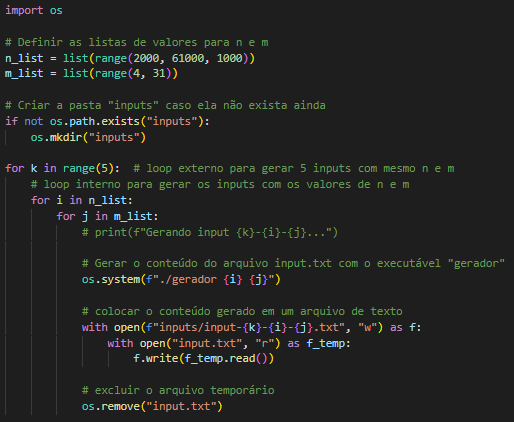

Como pode-se ver, foram gerados 5 inputs com mesmos n e m de modo a, posteriormente, tirar a média dos dados ára que se tenha maior segurança das informações, ou seja, minimizar os efeitos da "sorte" caso aconteça para algum dos inputs.

**Observação:**

Para a nomenclatura dos inputs, foi utilizado o seguinte padrão: `input-v-n-m.txt`
- n é o número de filmes
- m é o número de categorias
- v é a versão com n e m específicos. Existem 5 versões dos inputs com mesmos n e m.

O código acima mostra que foi variado `n` e `m`, de modo a fazer uma análise futura em um gráfico 3D. Neste relatório, no entanto, será mostrado um recorte, considerando os resultados para um `m` fixo e depois para um `n` fixo.

Para gerar gráficos de modo a realizar comparações, foi feito o arquivo `roda_inputs.py`. Neste arquivo, são encontradas algumas, funções, que serão explicadas a seguir. 

Para executar o input com um executável (`./gulosa` ou `./aleatoria`), foi usada a seguinte função:

In [ ]:
def roda_com_entrada(executavel, arquivo_in):

  with open(arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    time_e = end-start
    stdout = proc.stdout

    print('Saída:', proc.stdout)
    # print('Stderr:', proc.stderr)
    print('Tempo total(s): ', (end - start))
  
  return (stdout, time_e)

### Gráficos gerados para `m` fixo

Outra função foi a `gera_grafico_n`, que irá plotar os gráficos variando o número `n` de filmes e fixando o número de categorias em **10**.

Foram criados dicionários para cada versão dos inputs, cujas chaves são as informações que se uer analisar:

- `tempo_exec`: tempo de execução para cada `n` da versão;

- `n_filmes`: `n` filmes do input (variante);

- `quant_filmes`: quantidade de filmes na maratona;

- `total_time`: tempo de tela.

Cada chave tem como item uma lista com os valores variando para cada `n`.

Com os dicionários feitos, foi feita uma lista com eles. 
Depois, é feito um loop para cada `n`, iterando dentro dele as versões, ou seja, para cada `n` existem 5 versões diferente de inputs, com mesmo `n`.

foi chamada a função `roda_com_entrada`, que retorna o tempo de execução considerando o input e a saída, que foi lida e se extraiu a quantidade de filmes na maratona e o tempo de tela.

Depois, foram feitas as médias de tempo de execução, quantidade de filmes na maratona e tempo de tela, considerando as 5 versões.

As médias foram adicionadas em listas para plotar os gráficos.



In [1]:
# função que gera gráficos para o tempo de execução em função do número de filmes, considerando um número fixo de categorias
def gera_grafico_n(busca):

    busca_tratada = busca.replace('./', '')

    dict_v0 = {'tempo_exec': [], 'n_filmes': [x for x in range(2000, 61000, 1000)], 'quant_filmes': [], 'total_time': []}
    dict_v1 = {'tempo_exec': [], 'n_filmes': [x for x in range(2000, 61000, 1000)], 'quant_filmes': [], 'total_time': []}
    dict_v2 = {'tempo_exec': [], 'n_filmes': [x for x in range(2000, 61000, 1000)], 'quant_filmes': [], 'total_time': []}
    dict_v3 = {'tempo_exec': [], 'n_filmes': [x for x in range(2000, 61000, 1000)], 'quant_filmes': [], 'total_time': []}
    dict_v4 = {'tempo_exec': [], 'n_filmes': [x for x in range(2000, 61000, 1000)], 'quant_filmes': [], 'total_time': []}

    dict_list = [dict_v0, dict_v1, dict_v2, dict_v3, dict_v4]
    
    for n in range(2000, 61000, 1000):
        for v in range(0, 5):

            saida_tempo = roda_com_entrada(busca, f'inputs/input-{v}-{n}-{10}.txt')
            
            dict_list[v]['tempo_exec'].append(saida_tempo[1])
            # print(f'Versão {v} - Tempo de execução')
            # print(dict_list[v]['tempo_exec'])

            with open (saida_tempo[2], 'r') as f:
                # Primeira linha do arquivo de saída
                line = f.readline().replace('\n', '')

                if line != '':
                    dict_list[v]['quant_filmes'].append(line)
                # print(f'Versão {v} - Quantidade de filmes')
                # print(dict_list[v]['quant_filmes'])

                    # última linha do arquivo de saída
                    for line in f:
                        pass

                    line = line.replace('\n', '')
                    dict_list[v]['total_time'].append(line)

                else:
                    dict_list[v]['quant_filmes'].append(0)
                    dict_list[v]['total_time'].append(0)

    # fazer média dos tempos de execução
    lis_tempo = []
    for i in range(0, len(dict_list[0]['tempo_exec'])):
        soma = 0
        for j in range(0, 5):
            soma += dict_list[j]['tempo_exec'][i]
        lis_tempo.append(soma/5)

    # fazer média das quantidades de filmes
    lis_quant_filmes = []
    for i in range(0, len(dict_list[0]['quant_filmes'])):
        soma = 0
        for j in range(0, 5):
            soma += int(dict_list[j]['quant_filmes'][i])
        lis_quant_filmes.append(soma/5)

    # fazer média dos tempos totais de tela
    lis_total_time = []
    for i in range(0, len(dict_list[0]['total_time'])):
        soma = 0
        for j in range(0, 5):
            soma += int(dict_list[j]['total_time'][i])
        lis_total_time.append(soma/5)

    lis_nfilmes = dict_list[0]['n_filmes']

    # PLotando gráficos

    # Tempo de execução X número de filmes
    plt.plot(lis_nfilmes, lis_tempo)
    plt.xlabel('Número de filmes')
    plt.ylabel('Tempo de execução (s)')
    plt.title(f'Tempo de execução X número de filmes - 10 categorias \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-tempoxn.png')
    plt.clf()


    # Quantidade de filmes na maratona X número de filmes
    plt.plot(lis_nfilmes, lis_quant_filmes)
    plt.xlabel('Número de filmes')
    plt.ylabel('Quantidade de filmes')
    plt.title(f'Quantidade de filmes X número de filmes - 10 categorias \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-nxquant.png')
    plt.clf()

    # Tempo total de tela X número de filmes
    plt.plot(lis_nfilmes, lis_total_time)
    plt.xlabel('Número de filmes')
    plt.ylabel('Tempo total de tela (s)')
    plt.title(f'Tempo total de tela X número de filmes - 10 categorias \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-nxtempo.png')
    plt.clf()

    # plt.show()

#### Tempo de execução X n

![alt](graficos/gulosa-tempoxn.png) | ![alt](graficos/aleatoria-tempoxn.png)

É possível notar que a versão aleatória possui uma tendência de crescimento um pouco menor. Isso pode ser explicado pelo fato de que a versão gulosa sempre irá escolher o filme com maior pontuação, precisando, para cada horário de início, percorrer todos os filmes para encontrar aquele que satifaz o requisito de possuir menor duração. Já a versão aleatória, ao escolher um filme aleatório, não precisa percorrer todos os filmes. No entando, foi feito um loop para a versão aleatória para que se fique sorteando novamente enquanto o filme sorteado não satisfaz requisitos ter o horário de fim maior que o horário de início e ter uma categoria que não exceda o máximo de categorias. Este loop, dependendo dos inputs, pode acrescentar um tempo de execução.


#### Tempo de tela X n

![alt](graficos/gulosa-nxtempo.png) | ![alt](graficos/aleatoria-nxtempo.png)

Podemos observar que ambos tempos de tela, tanto para gulosa quanto para aleatória, são constantes. A média de tempo total de tela, para cada `n` é sempre 24h, já que, no caso da gulosa, sempre são colocados os filmes com menor duração que, em geral, é de 1h, possibilitando que sejam assistidas 24h de filmes. No caso da aleatória, a média de tempo total de tela também é constante em 24h, pois considerando a quantidade grande de filmes, sempre será encontrado um filme válido, evitando lacunas de tempo durante o dia.

#### Quantidade de filmes na maratona X n

![alt](graficos/gulosa-nxquant.png) | ![alt](graficos/aleatoria-nxquant.png)

Considerando a implememtação gulosa, a quantidade de filmes na maratona é constante para cada `n`, já que sempre será escolhido o filme com menor duração e , dada a quantidade de filmes, a possibilidade de se encontrar um que tenha 1h de duração é grande. No caso da versão aleatória, a quantidade de filmes na maratona varia, dado que, ao aleatoriezar, não é garantido que se pegue um filme com a menor duração possível, sendo possível que se tenha filmes com duração de até 3h, diminuindo assim a quantidade de filmes assistidos. 

### Gráficos gerados para `n` fixo

Agora, variando `m` e fixando `n` em **50000**, foi feita a função `gera_grafico_m`, que segue a mesma ideia da função acima, porém as iterações dos inputs serão feitas em `m`.

In [ ]:

# função que gera gráficos para o tempo de execução em função do número de categorias, considerando um número fixo de filmes (50000)
def gera_grafico_m(busca):
    busca_tratada = busca.replace('./', '')
    dict_v0 = {'tempo_exec': [], 'm_categorias': [x for x in range(5, 31)], 'quant_filmes': [], 'total_time': []}
    dict_v1 = {'tempo_exec': [], 'm_categorias': [x for x in range(5, 31)], 'quant_filmes': [], 'total_time': []}
    dict_v2 = {'tempo_exec': [], 'm_categorias': [x for x in range(5, 31)], 'quant_filmes': [], 'total_time': []}
    dict_v3 = {'tempo_exec': [], 'm_categorias': [x for x in range(5, 31)], 'quant_filmes': [], 'total_time': []}
    dict_v4 = {'tempo_exec': [], 'm_categorias': [x for x in range(5, 31)], 'quant_filmes': [], 'total_time': []}
    

    dict_list = [dict_v0, dict_v1, dict_v2, dict_v3, dict_v4]

    for m in range(5, 31):
        for v in range(0, 5):
            # print("Categorias: ", dict_list[v]['m_categorias'])
            saida_tempo = roda_com_entrada(busca, f'inputs/input-{v}-50000-{m}.txt')
            
            dict_list[v]['tempo_exec'].append(saida_tempo[1])
            print(f'Versão {v} - Tempo de execução')
            print(dict_list[v]['tempo_exec'])

            with open (saida_tempo[2], 'r') as f:
                # Primeira linha do arquivo de saída
                line = f.readline().replace('\n', '')
                
                # Se a linha não for vazia:
                if line != '':
                    dict_list[v]['quant_filmes'].append(line)
                
                    # print(f'Versão {v} - Quantidade de filmes')
                    # print(dict_list[v]['quant_filmes'])

                    # última linha do arquivo de saída
                    for line in f:
                        pass

                    line = line.replace('\n', '')
                    dict_list[v]['total_time'].append(line)

                else:
                    dict_list[v]['quant_filmes'].append(0)
                    dict_list[v]['total_time'].append(0)

    # fazer média dos tempos de execução
    lis_tempo = []
    for i in range(0, len(dict_list[0]['tempo_exec'])):
        soma = 0
        for j in range(0, 5):
            soma += dict_list[j]['tempo_exec'][i]
        lis_tempo.append(soma/5)

    print("\nTempo de execução:")
    print(lis_tempo)


    # fazer média das quantidades de filmes
    lis_quant_filmes = []
    for i in range(0, len(dict_list[0]['quant_filmes'])):
        soma = 0
        for j in range(0, 5):
            soma += int(dict_list[j]['quant_filmes'][i])
        lis_quant_filmes.append(soma/5)


    # fazer média dos tempos totais de tela
    lis_total_time = []
    for i in range(0, len(dict_list[0]['total_time'])):
        soma = 0
        for j in range(0, 5):
            soma += int(dict_list[j]['total_time'][i])
        lis_total_time.append(soma/5)


    # PLotando gráficos
    lis_mcategorias = dict_list[0]['m_categorias']

    # Tempo de execução X número de categorias
    plt.plot(lis_mcategorias, lis_tempo)
    plt.xlabel('Número de categorias')
    plt.ylabel('Tempo de execução (s)')
    plt.title(f'Tempo de execução X número de categorias - 50000 filmes \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-tempoxm.png')
    plt.clf() # limpa o gráfico

    # Quantidade de filmes na maratona X número de categorias
    plt.plot(dict_v1['m_categorias'], lis_quant_filmes)
    plt.xlabel('Número de categorias')
    plt.ylabel('Quantidade de filmes')
    plt.title(f'Quantidade de filmes na maratona X número de categorias - 50000 filmes \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-mxquant.png')
    plt.clf() 

    # Tempo total de tela X número de categorias
    plt.plot(dict_v1['m_categorias'], lis_total_time)
    plt.xlabel('Número de categorias')
    plt.ylabel('Tempo total de tela (s)')
    plt.title(f'Tempo total de tela X número de categorias - 50000 filmes \n {busca_tratada}')

    plt.savefig(f'graficos/{busca_tratada}-mxtempo.png')
    plt.clf()

#### Tempo de execução X m

![alt](graficos/gulosa-tempoxm.png) | ![alt](graficos/aleatoria-tempoxm.png)

O tempo de execução para a versão aleatória é claramente menor que o tempo de execução para a versão gulosa. Assim como para caso do valor de categorias fixa, isso pode ser explicado pelo fato de que a versão gulosa sempre irá escolher o filme com maior pontuação, precisando, para cada horário de início, percorrer todos os filmes para encontrar aquele que satifaz o requisito de possuir menor duração. Já a versão aleatória, ao escolher um filme aleatório, não precisa necessariamente percorrer todos os filmes, sendo acrescentado tempo de execução em casos em que o filme sorteado não seja válido.

#### Tempo de tela X m

![alt](graficos/gulosa-mxtempo.png) | ![alt](graficos/aleatoria-mxtempo.png)

Sobre o tempo de tela em função do número de categorias, em ambas implementações se consegue atingir as 24 horas com aproximadamente 8 categorias. No caso da aleatória, o crescimento acaba sendo mais "smooth" e se percebe tempos de tela maiores, desde o início, já que, para apenas 5 categorias, são encontradas soluções que permitem mais de 19h de tempo de tela, enquanto no caso da gulosa, para 5 categorias, o tempo de tela é de 15h. 

Isso ocorre devido ao exploration adquirido na aleatorização, que não pega o menor filme, mas um aleatório. Isso permite que se encontre soluções melhores que as encontradas na versão gulosa, que, por sua vez, para categorias menores acaba atingindo o limite de filmes por categoria mais rápido, diminuindo a quantidade de filmes que podem ser colocados na maratona. 

#### Quantidade de filmes na maratona X m

![alt](graficos/gulosa-mxquant.png) | ![alt](graficos/aleatoria-mxquant.png)

Assim como para o caso com `m` fixo, a quantidade de filmes na maratona tem mais variação para a versão aleatória, já que, ao aleatoriezar, não é garantido que se pegue um filme com a menor duração possível, possibilitando que se tenha filmes com duração de até 3h, o que diminui a quantidade de filmes assistidos.

Uma outra observação a ser feita é que a quantidade de filmes para quantidades pequenas de categorias, em ambos casos, é menor, dado que o limite de filmes por categoria pode acabar sendo atingido mais rápido, diminuindo a quantidade de filmes que podem ser colocados na maratona.

### Conclusão

Com a análise dos gráficos é possível fazer algumas conclusões comparativas para as implementações feitas.

- A implementação gulosa, pode ser avaliada de forma melhor que a implementação aleatoria em termos de quantidade de filmes na maratona, já que sempre prioriza os filmes de menor duração.

- No entanto, em termos de velocidade de execução e tempo total de tela, a implementação aleatória é melhor.
    - No caso da velocidade, a aleatorização permite que se tenha 25% de chance de se conseguir um filme aleatoriamente, evitando precisar percorrer todos os filmes para encontrar aquele com menor duração.

    - No caso do tempo total de tela a aleatória é melhor em casos de números mais baixos de categorias, até 7 e, a partir deste valor, os resultados são iguais.